# Problem statement

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn


In [54]:
# calling csv file of medical cost insurance 
df=pd.read_csv('Medical_cost_insurance.csv')
df

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
df.head()

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.tail()

,age,Gender,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [57]:
df.sample(10)

,age,Gender,bmi,children,smoker,region,charges
876,49,female,27.100,1,no,southwest,26140.36030
757,47,female,27.830,0,yes,southeast,23065.42070
137,22,male,25.175,0,no,northwest,2045.68525
866,18,male,37.290,0,no,southeast,1141.44510
669,40,female,29.810,1,no,southeast,6500.23590
1133,52,female,18.335,0,no,northwest,9991.03765
625,29,female,26.030,0,no,northwest,3736.46470
97,55,male,38.280,0,no,southeast,10226.28420
343,63,male,36.765,0,no,northeast,13981.85035
1095,18,female,31.350,4,no,northeast,4561.18850


In [58]:
df.shape

(1338, 7)

In [59]:
#checking information of the data set about the columns,null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
# checking null values 
df.isnull().sum()

age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

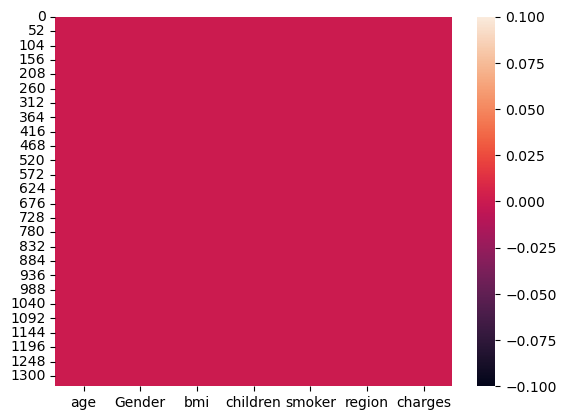

In [61]:
sns.heatmap(df.isnull())

from the above we can said that there is no null values in the dataset

In [62]:
# converting catagorical data into numerical values 
from sklearn.preprocessing import LabelEncoder

In [63]:
# making instance of labelencoder
le=LabelEncoder()

#converting data set
df['region']=le.fit_transform(df['region'])

df['Gender']=le.fit_transform(df['Gender'])

df['smoker']=le.fit_transform(df['smoker'])

In [64]:
df

,age,Gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


from above data set we can say that 
Gender= 0-female ,1-male
smoker= 0- no smoker , 1-smoker
region= 0- northeast , 1- northwest, 2-southeast, 3-southwest

# statistical summry

In [65]:
df.describe()

,age,Gender,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


in column age = 25% of the people are under age 27 , 50% of the people falls below 39 and 75% people falls below age 51
the highest age in this data set is 64

in bmi column the value 75% and max has large difference so there may b chances of outliers in the data set 

# Checking correlation 

In [66]:
df.corr()

,age,Gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
Gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


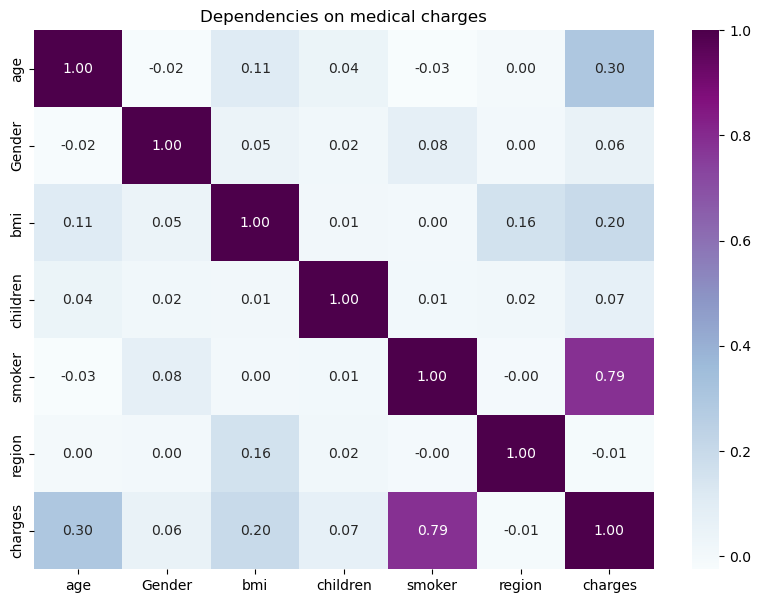

In [67]:
corr=df.corr
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='BuPu',annot=True,fmt='.2f')
plt.title('Dependencies on medical charges')
plt.show()

smoker has the highest impact on the medical insurance charges while age and bmi patient follows 2nd and 3rd 
on the other hand gender, region and children has lowest impact on the charges 

# EDA

<AxesSubplot:title={'center':'age vs insurance charges'}, xlabel='age', ylabel='charges'>

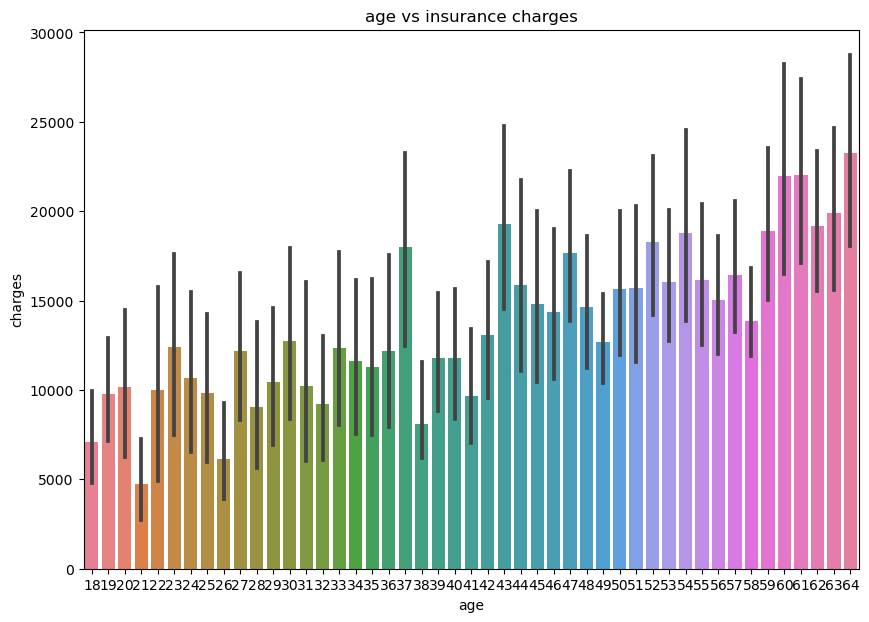

In [68]:
#impact of age to charges 
plt.figure(figsize=(10,7))
plt.title('age vs insurance charges')
sns.barplot(x='age',y='charges',data=df,palette='husl')


from above graph we can say that the insurance charges has been increase as the age of the person is increasing 

<AxesSubplot:title={'center':'region vs Charge'}, xlabel='region', ylabel='charges'>

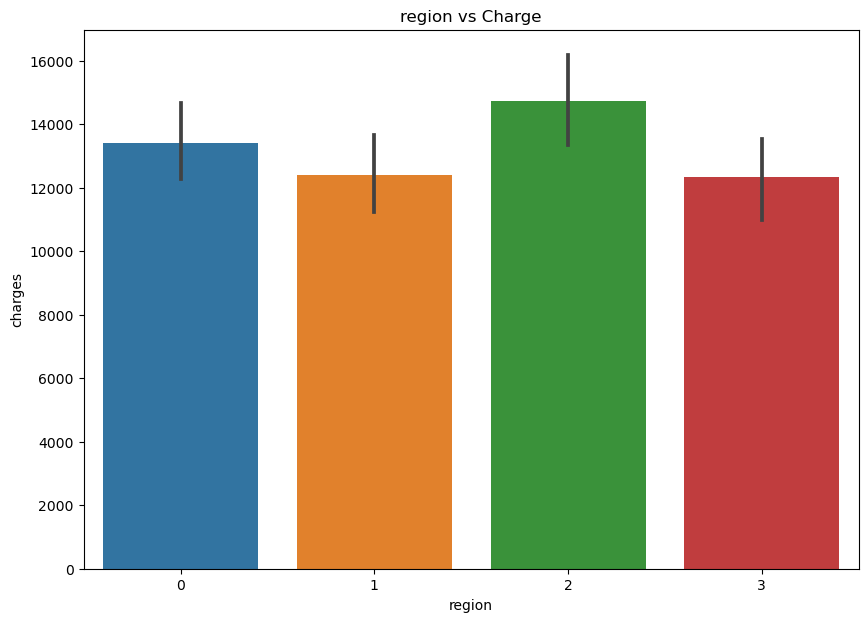

In [69]:
plt.figure(figsize=(10,7))
plt.title('region vs Charge')
sns.barplot(x='region',y='charges',data=df)

In [70]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

from above graph we can see that highest insurance cost paid by the people living in southeast region
the people from northwest and southwest region paying similar charges 

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

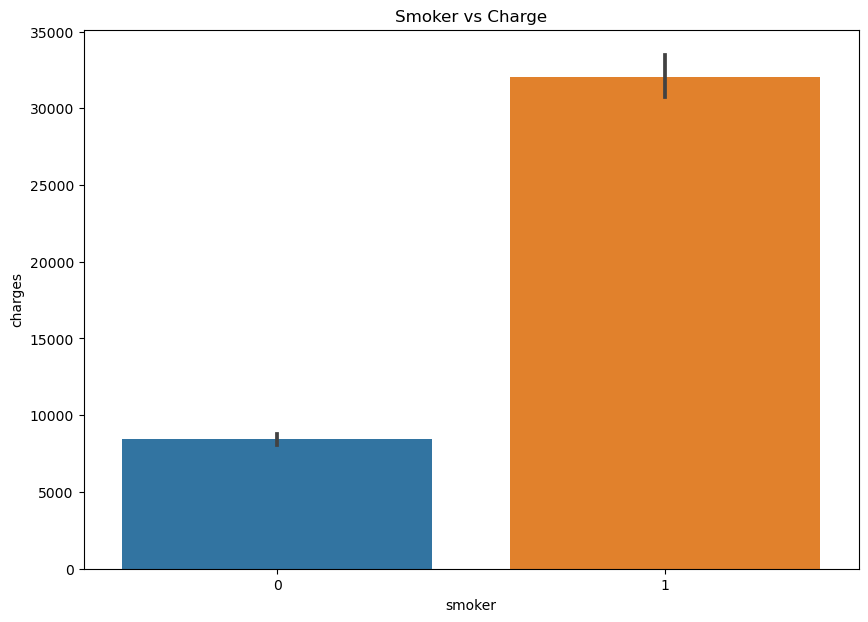

In [71]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df)

from the avove graph we can say that non smoker people pay very less health insurance charges than the smokers do 

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='bmi', ylabel='charges'>

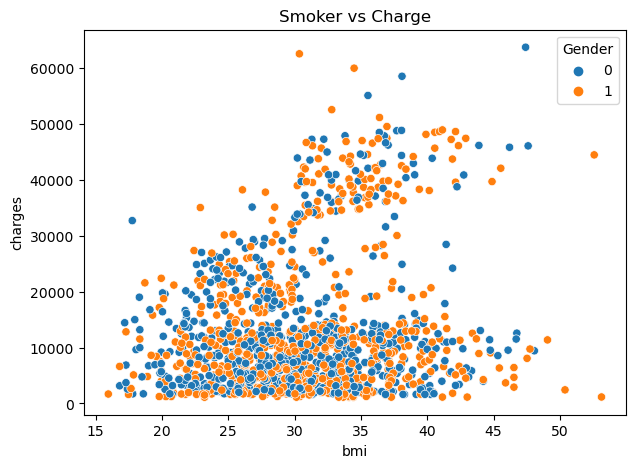

In [72]:
plt.figure(figsize=(7,5))
plt.title('Smoker vs Charge')
sns.scatterplot(x='bmi',y='charges',data=df,hue='Gender')

from above plot we can see that only few male and female are under weight(10 - 20) and therfore paying less charges
the bmi and chargesindicates positive relationship here as the bmi increase the applicable charges has also increase 

<AxesSubplot:title={'center':'gender vs Charges'}, xlabel='Gender', ylabel='charges'>

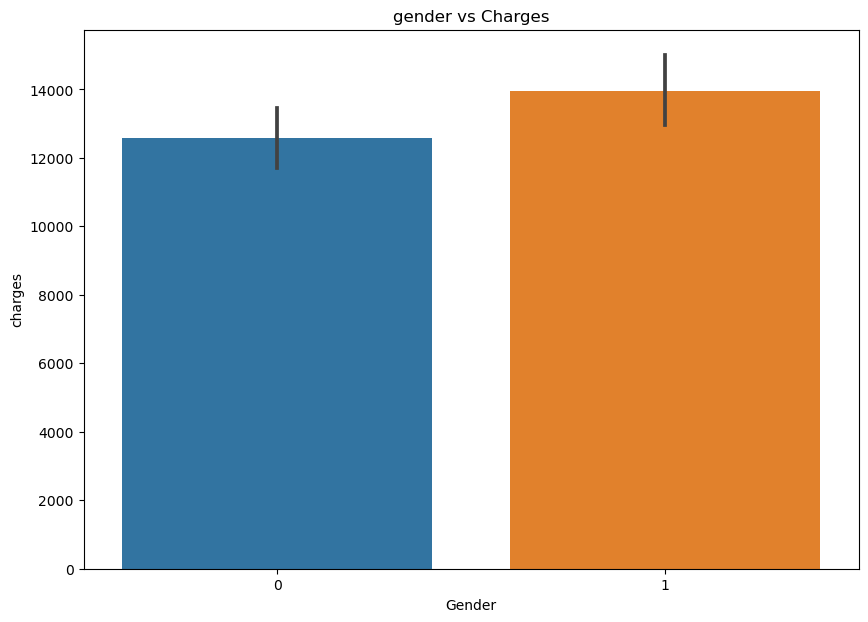

In [73]:
plt.figure(figsize=(10,7))
plt.title('gender vs Charges')
sns.barplot(x='Gender',y='charges',data=df)

from above graph we can analyiz that male paying more insurance charges as compare to female 

# checking skewness

In [74]:
df.skew()

age         0.055673
Gender     -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

Text(0.5, 1.0, 'Age Distribution')

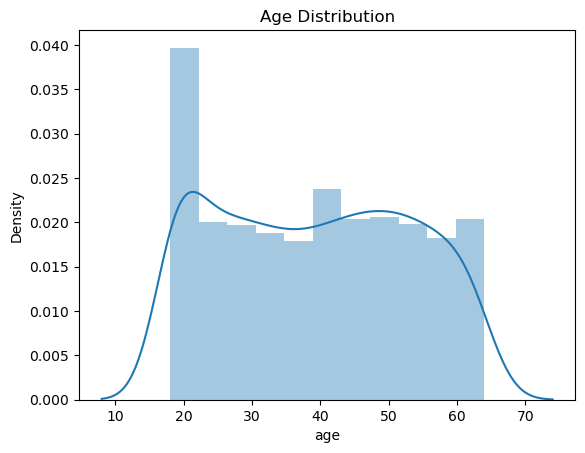

In [75]:
sns.distplot(df['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'bmi distribution')

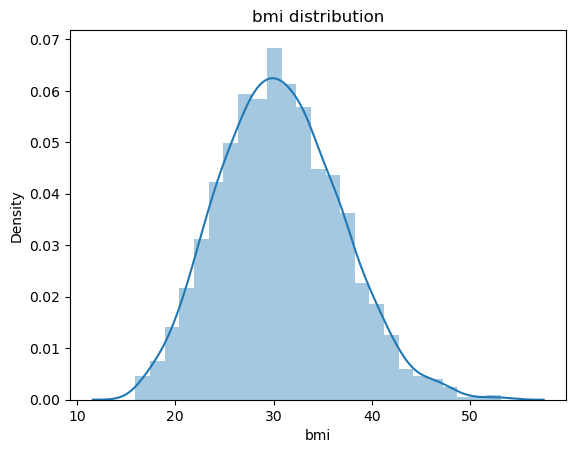

In [76]:
sns.distplot(df['bmi'])
plt.title('bmi distribution')

Text(0.5, 1.0, 'charges distribution')

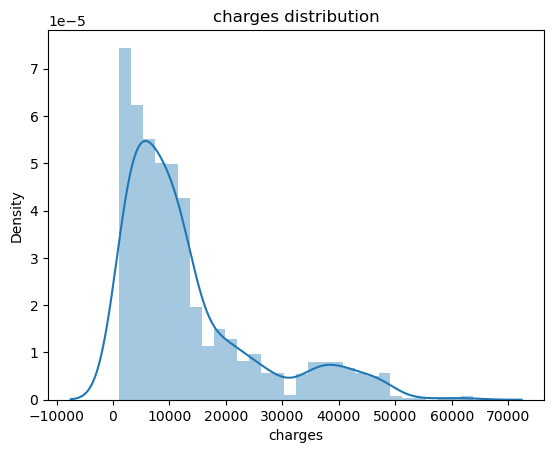

In [77]:
sns.distplot(df['charges'])
plt.title('charges distribution')


# cheking outliers

<AxesSubplot:>

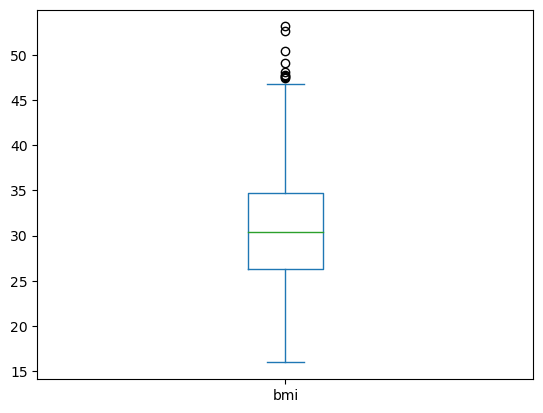

In [78]:
df['bmi'].plot.box()

<AxesSubplot:>

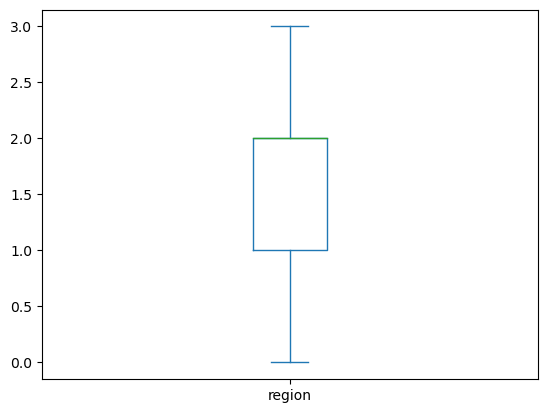

In [79]:
df['region'].plot.box()

<AxesSubplot:>

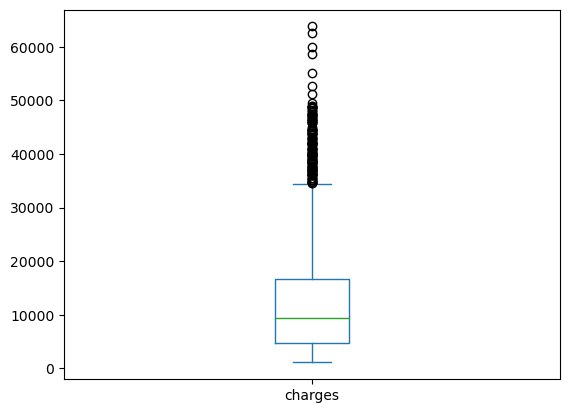

In [80]:
df['charges'].plot.box()

age            AxesSubplot(0.125,0.53;0.0824468x0.35)
Gender      AxesSubplot(0.223936,0.53;0.0824468x0.35)
bmi         AxesSubplot(0.322872,0.53;0.0824468x0.35)
children    AxesSubplot(0.421809,0.53;0.0824468x0.35)
smoker      AxesSubplot(0.520745,0.53;0.0824468x0.35)
region      AxesSubplot(0.619681,0.53;0.0824468x0.35)
charges     AxesSubplot(0.718617,0.53;0.0824468x0.35)
dtype: object

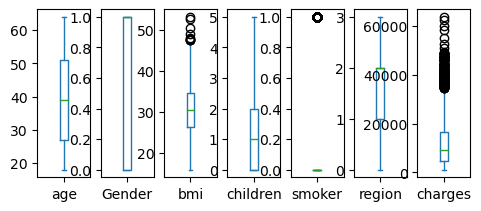

In [81]:
df.plot(kind='box',subplots=True,layout=(2,8))

from the above analysis we can say that the charges column has skewness and outliers are also present there but there are cases 
in which the charges values differs according to age,gender, region so it is not necessary to eleminate the outliers for this data 

# scaling of the dataset

In [82]:
#spliting up the dataset 
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [83]:
x

,age,Gender,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [84]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [85]:
#caliing out the library 
from sklearn.preprocessing import StandardScaler

In [86]:
st=StandardScaler()

x=st.fit_transform(x)

x

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

# preparation of dataset

In [115]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

In [116]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [117]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}')
    

At random state 0,the training accuracy is :- 0.7368306228430945
At random state 0,the testing accuracy is :-0.799874714544996
At random state 1,the training accuracy is :- 0.7475615631933096
At random state 1,the testing accuracy is :-0.7623224022563388
At random state 2,the training accuracy is :- 0.7519923667088932
At random state 2,the testing accuracy is :-0.7445422986536503
At random state 3,the training accuracy is :- 0.7530732192579027
At random state 3,the testing accuracy is :-0.7406256738597918
At random state 4,the training accuracy is :- 0.7605730367332922
At random state 4,the testing accuracy is :-0.6970099489172211
At random state 5,the training accuracy is :- 0.742751800397326
At random state 5,the testing accuracy is :-0.7790865933969187
At random state 6,the training accuracy is :- 0.7433828393740967
At random state 6,the testing accuracy is :-0.7785295914318422
At random state 7,the training accuracy is :- 0.7465780121439667
At random state 7,the testing accuracy is

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


LinearRegression

In [119]:
lr=LinearRegression()

In [120]:
lr.fit(x_train,y_train)

LinearRegression()

In [121]:
y_pred=lr.predict(x_test)

In [185]:
r2_score_linear= r2_score(y_test,y_pred)
print(r2_score_linear)

0.7694415927057693


In [123]:
from sklearn.model_selection import cross_val_score

In [175]:
lrcv_score=cross_val_score(lr,x,y,cv=5)
print(lrcv_score)
print(lrcv_score.mean())


[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954


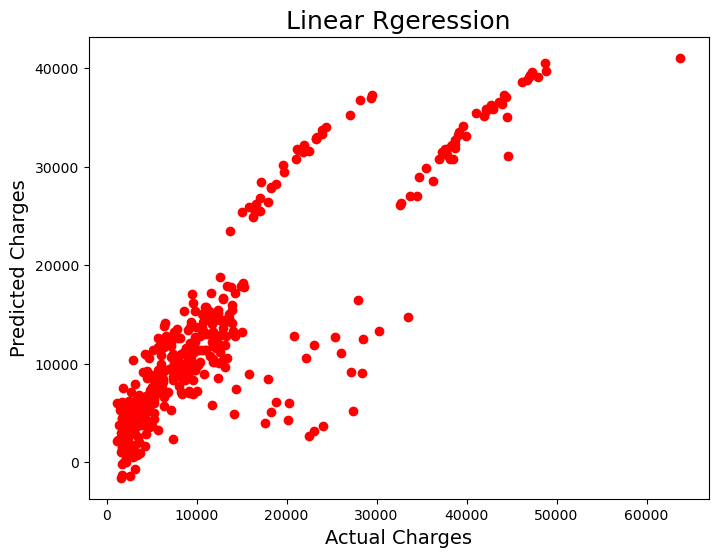

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred, color='r')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Rgeression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Randomforest regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [130]:
rf=RandomForestRegressor()

parameters={ 'n_estimators':[50,100,150,200,250],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}


rf_grid=GridSearchCV(estimator=rf, param_grid=parameters, cv=5,verbose=2, n_jobs=-1)



In [132]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=2)

In [133]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 12,
 'min_samples_split': 7,
 'n_estimators': 150}

In [134]:
rf_grid.best_score_

0.8444670487231566

In [138]:
# Applying suggested paramters of randomforest classifier to training the model 
rfl=RandomForestRegressor(criterionmax_depth=40, min_samples_leaf=12, min_samples_split=7,n_estimators=150)





In [139]:
#training the model
rfl.fit(x_train,y_train)


RandomForestRegressor(max_depth=40, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=150)

In [187]:
rfl_pred=rfl.predict(x_test)

r2_score_rfc = r2_score(y_test,rfl_pred)

print(r2_score_rfc)

0.8704692677409721


In [167]:
from sklearn.model_selection import cross_val_score


In [179]:
rfc_cv_score=cross_val_score(rfl,x,y,cv=5)
print(rfc_cv_score)
print(rfc_cv_score.mean())



[0.8815422  0.80300986 0.89305473 0.84805837 0.87328142]
0.8597893184186465


Support vector machine (regressor)

In [142]:
from sklearn.svm import SVR

In [149]:
sv=SVR()

parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

sv_grid=GridSearchCV(estimator=sv, param_grid=parameters, cv=5,verbose=2, n_jobs=-1)


In [150]:
sv_grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=2)

In [151]:
sv_grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid', 'tol': 0.0001}

In [153]:
sv_grid.best_score_

0.45940494286807887

In [154]:
sv1=SVR(C=100, gamma='scale',kernel='sigmoid',tol=0.0001)

In [155]:
sv1.fit(x_train,y_train)

SVR(C=100, kernel='sigmoid', tol=0.0001)

In [156]:
sv1_pred=sv1.predict(x_test)

In [189]:
r2_score_sv = r2_score(y_test,sv1_pred)

print(r2_score_sv)

0.5151610213550637


In [178]:
svcv_score=cross_val_score(sv1,x,y,cv=5)
print(svcv_score)
print(svcv_score.mean())

[0.52432696 0.49218326 0.51433809 0.50645603 0.478901  ]
0.5032410668577321


Lasso regression

In [158]:
from sklearn.linear_model import Lasso

In [159]:
ls=Lasso()

parameters={'alpha':[.0001,.001,.01,.1, 1, 10],'random_state':list(range(0,10))}


ls_grid=GridSearchCV(estimator=ls, param_grid=parameters, cv=5,verbose=2, n_jobs=-1)


In [160]:
ls_grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=2)

In [161]:
ls_grid.best_params_

{'alpha': 10, 'random_state': 0}

In [162]:
ls_grid.best_score_

0.7289188708002422

In [165]:
ls=Lasso(alpha =10,random_state=0)

ls.fit(x_train,y_train)


Lasso(alpha=10, random_state=0)

In [190]:
ls_pred=ls.predict(x_test)

r2_score_ls = r2_score(y_test,ls_pred)

print(r2_score_ls)

0.7694790451427433


In [181]:
lscv_score=cross_val_score(ls,x,y,cv=5)
print(lscv_score)
print(lscv_score.mean())

[0.76130857 0.70872038 0.77767669 0.73362133 0.75518386]
0.7473021640199378


from above we can say that RandomForestRegressor is the best fit model, there for we can save it 


# model saving

In [194]:
import pickle

filename='rfc.insurance_charges,pkl'

pickle.dump(rfl,open(filename,'wb'))

In [195]:
with open(filename, 'rb') as file:  
    rfc_charges = pickle.load(file)

In [196]:
rfc_charges

RandomForestRegressor(max_depth=40, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=150)

In [205]:
pred=rfc_charges.predict(np.array([18,1,33.770,1,0,2]).reshape(1,-1))[0]

In [206]:
print('{0:.2f}'.format(pred))

18192.24
